## 랜덤 포레스트

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

#나무 구조 시각화(.dot 확장자 파일 불러오기)
import graphviz

#데이터 분할 : train, test
from sklearn.model_selection import train_test_split

#예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor as RFR

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [19]:
matplotlib.rc('font', family = 'NanumGothic')

In [3]:
df_raw = pd.read_csv('/home/piai/Downloads/체질검사.csv', engine = 'python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1 , inplace = False)

In [5]:
#train_test_split (X : 설명변수 데이터, Y : 목표변수 데이터, test_size = test 데이터 비율, random_state : random seed)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size = 0.3, random_state = 1234)
print(f'train data X size :{df_train_x.shape}')
print(f'train data Y size :{df_train_y.shape}')
print(f'test data X size :{df_test_x.shape}')
print(f'test data Y size :{df_test_y.shape}')

train data X size :(176, 13)
train data Y size :(176,)
test data X size :(76, 13)
test data Y size :(76,)


In [7]:
#RandomForestRegressor 을 이용하여 gradient boosting 모델 생성
#모델 생성
rf_uncustomized = RFR(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
#test 데이터 설명력
print('Score on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.956
Score on test set : 0.612


### n_estimators: 트리 수 변경에 따른 모델 성능


In [15]:
#train 및 test 설명력 결과 저장
train_score = []
test_score = []

### n_estimators: 트리 수 변경 1~100

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
for v_n_estimators in para_n_tree:
    rf = RFR(random_state = 1234 , 
             n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#결과 저장
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [16]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.936,0.542
1,20,0.946,0.597
2,30,0.952,0.610
3,40,0.955,0.609
4,50,0.955,0.611
5,60,0.956,0.616
6,70,0.955,0.614
7,80,0.955,0.611
8,90,0.956,0.610
9,100,0.956,0.612


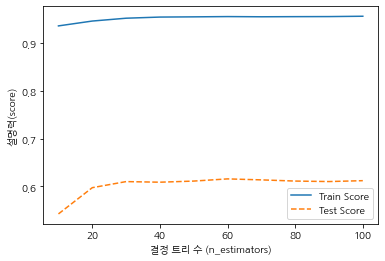

In [20]:
#모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = "--", label = 'Test Score')
plt.ylabel('설명력(score)')
plt.xlabel('결정 트리 수 (n_estimators)')
plt.legend()

### min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [31]:
#train 및 test 설명력 결과 저장
train_score = []
test_score = []

#min_samples_leaf : 잎사귀 최소 자료 수 * 참조 : para_leaf : [1,2,3,...,19]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RFR(n_estimators = 100,
             random_state = 1234 , 
             min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [32]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.956,0.612
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


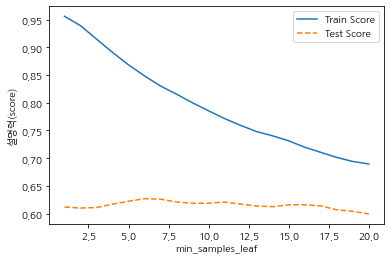

In [33]:
#모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = "--", label = 'Test Score')
plt.ylabel('설명력(score)')
plt.xlabel('min_samples_leaf')
plt.legend()

### min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [36]:
#train 및 test 설명력 결과 저장
train_score = []
test_score = []

#min_samples_split : 분리노드 최소 자료 수 * 참조 : para_split : [1,2,3,...,19]

para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RFR(n_estimators = 100,
             min_samples_leaf = 6,
             random_state = 1234,
             min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [37]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.849,0.627
1,6,0.849,0.627
2,8,0.849,0.627
3,10,0.849,0.627
4,12,0.849,0.627
5,14,0.839,0.629
6,16,0.831,0.629
7,18,0.821,0.628
8,20,0.813,0.628
9,22,0.803,0.628


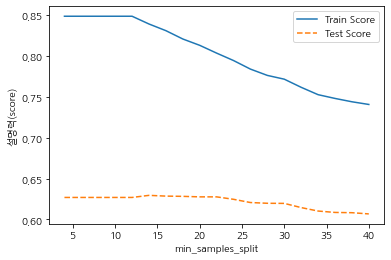

In [39]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_split, test_score, linestyle = "--", label = 'Test Score')
plt.ylabel('설명력(score)')
plt.xlabel('min_samples_split')
plt.legend()

### Max_depth : 최대 깊이 변경에 따른 모델 성능

In [62]:
## train 및 test 설명력 결과 저장
train_score = []
test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RFR(random_state = 1234, 
             n_estimators = 100,
             min_samples_leaf = 6,
            min_samples_split = 13,
            max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

#결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.790,0.619
3,4,0.828,0.627
4,5,0.842,0.630
5,6,0.844,0.629
6,7,0.844,0.630
7,8,0.844,0.630
8,9,0.844,0.630
9,10,0.844,0.630


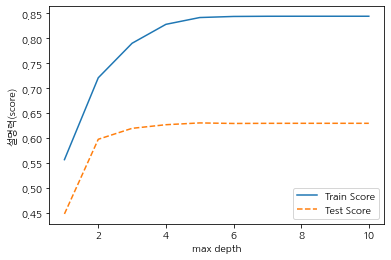

In [47]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = "--", label = 'Test Score')
plt.ylabel('설명력(score)')
plt.xlabel('max depth')
plt.legend()

### STEP3 최종 모델 선정

In [49]:
rf_final = RFR(random_state = 1234, 
             n_estimators = 100,
             min_samples_leaf = 6,
            min_samples_split = 14,
            max_depth = 4)
rf_final.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))

#test 데이터 설명력
print('Score on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.825
Score on test set : 0.627


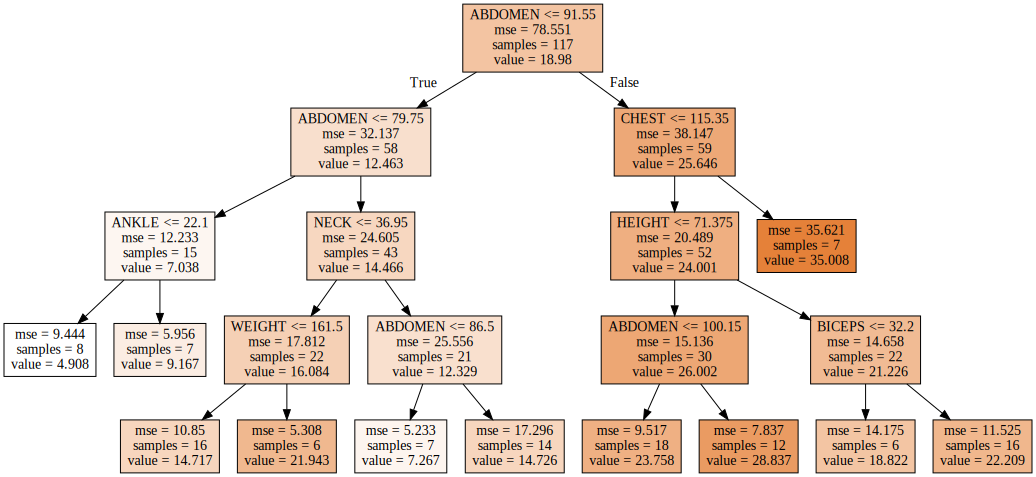

In [54]:
v_feature_name = df_train_x.columns

#0번 트리
export_graphviz(rf_final.estimators_[0], out_file = 'rf_final_0.dot', 
                feature_names = v_feature_name, impurity = True, filled = True)

#tree_final_0.dot 그리기
with open('rf_final_0.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

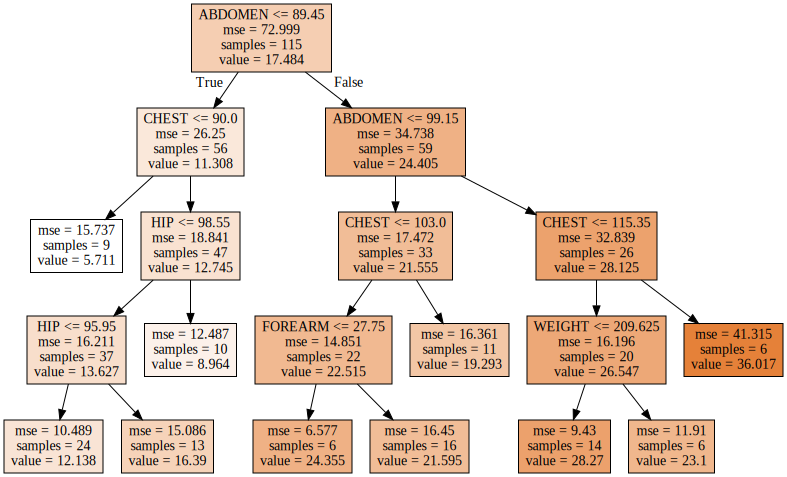

In [57]:
#1번 트리
export_graphviz(rf_final.estimators_[1], out_file = 'rf_final_1.dot', 
                feature_names = v_feature_name, impurity = True, filled = True)

#tree_final_1.dot 그리기
with open('rf_final_1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

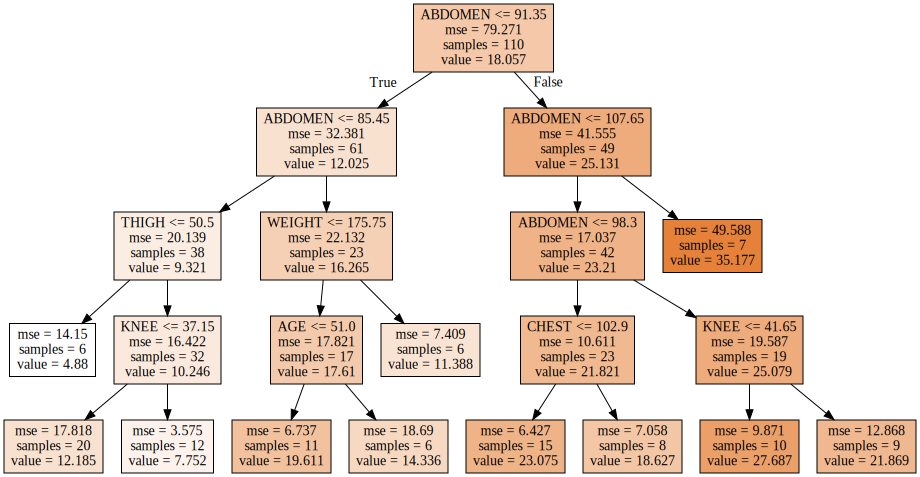

In [58]:
#10번 트리
export_graphviz(rf_final.estimators_[10], out_file = 'rf_final_10.dot', 
                feature_names = v_feature_name, impurity = True, filled = True)

#tree_final_10.dot 그리기
with open('rf_final_10.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [60]:
#feature_importances_ : 설명변수의 중요도
#tree_final, feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

#df_feature_importance 의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.843
4,CHEST,0.036
2,HEIGHT,0.032
0,AGE,0.014
6,HIP,0.014
7,THIGH,0.011
12,WRIST,0.010
3,NECK,0.010
8,KNEE,0.009
1,WEIGHT,0.008


Text(0, 0.5, '변수')

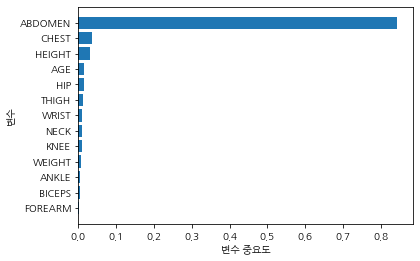

In [61]:
#설명변수 중요도 그래프, 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')